# Random and Local Search

## Random Search

Before we can code, some imports: We are considering randomised algorithms, and we want to plot results. To run this notebook, you will also need matplotlib, numpy, and scipy installed.

In [1]:
import matplotlib.pyplot as plt
import random

We will start with the One-Max problem: The aim of this optimisation problem is to find a binary vector of length `n` such that all elements are `1`. The solution is obvious to us, but not to a search algorithm. We first need to decide on a specific length of `n` for our experiments.

In [2]:
n = 20

In order to do any kind of random search, we need to be able to randomly sample solutions from the search space.

In [3]:
def get_random_solution():
    return [random.choice([0,1]) for _ in range(n)]

Now we can look at an example solution from our search space:

In [4]:
get_random_solution()

[1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0]

Every invocation will produce a different individual

In [5]:
get_random_solution()

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0]

To solve an optimisation problem, we also need an objective function, or _fitness function_, that quantifies how good a particular solution is with respect to the optimisation problem we are trying to solve. For our example one max problem, we can estimate how close we are to solving the problem by counting the number of `1`s in our solution.

In [6]:
def get_fitness(solution):
    return sum(solution)

In [7]:
get_fitness([0,0,0,0,0])

0

In [8]:
get_fitness([1,1,1,0,0])

3

We will keep track of what the search does; for this I'm simply using a plain list that contains the best fitness value observed at each iteration of the search.

In [9]:
fitness_values = []

In some cases, we know when we have found an optimal solution; sometimes we don't. Sometimes it may also take very long to find the optimal solution, therefore we limit the search with some _stopping criterion_. We will start by running the search for a fixed number of steps.

In [10]:
max_steps = 100

The following implements our first metaheuristic: _Random Search_. It's not a particularly intelligent one, but it will be the baseline we are going to compare against from now on. If the fitness landscape is bad, this algorithm may actually be better than many other metaheuristics.

In [11]:
def randomsearch():

    best = None
    best_fitness = -1

    for step in range(max_steps):
        candidate = get_random_solution()
        fitness = get_fitness(candidate)
        if fitness > best_fitness:
            best = candidate
            best_fitness = fitness
            print(f"Iteration {step}, fitness {fitness}: {candidate}")
        fitness_values.append(best_fitness)

    print(f"Solution fitness {best_fitness}: {best}")
    return best

Before invoking it, we also have to reset our list of fitness values.

In [12]:
fitness_values = []
randomsearch()

Iteration 0, fitness 8: [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0]
Iteration 1, fitness 12: [1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0]
Iteration 2, fitness 13: [0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
Iteration 17, fitness 14: [1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1]
Iteration 75, fitness 15: [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1]
Solution fitness 15: [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1]


[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1]

We kept track of the best solution found throughout the search, and we will use this information to learn about the progress, and compare search algorithms. Therefore, we are going to visualise it.

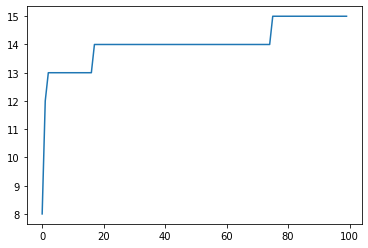

In [13]:
import matplotlib.pyplot as plt
plt.plot(fitness_values)

If you re-run the search multiple times you will get different results, but even for small values of `n` the random search will rarely find an optimal solution.

Random search is a _global_ search algorithm -- it considers the entire search space. An alternative strategy is to consider the local neighbourhood of candidate solutions, resulting in _local_ search algorithms. As a naive baseline, we can change our random search to a local random search, also known as a _random walk_. A random walk consists of repeatedly picking a random neighbour for a given candidate solution, therefore we need to define a function that picks a random neighbour; that is, a solution which differs only in a single step (in our case, a bit-flip).

In [14]:
def get_neighbour(candidate):
    pos = random.randint(0, len(candidate) - 1)
    copy = candidate[:]
    copy[pos] = 1 - copy[pos]
    return copy

In [15]:
get_neighbour([0,0,0,0,0,1,0,0,0,0])

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0]

In [16]:
get_neighbour([0,0,0,0,0,1,0,0,0,0])

[1, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [17]:
get_neighbour([0,0,0,0,0,1,0,0,0,0])

[1, 0, 0, 0, 0, 1, 0, 0, 0, 0]

To do a random walk, we start at a random solution, and repeatedly pick a random neighbour. Along the search, we keep track of the best solution found.

In [18]:
def randomwalk():
    current = get_random_solution()
    fitness = get_fitness(current)

    best = current[:]
    best_fitness = fitness
    print("Starting at fitness {}: {}".format(fitness, current))

    for step in range(max_steps):
        current = get_neighbour(current)
        fitness = get_fitness(current)

        if fitness > best_fitness:
            best = current
            best_fitness = fitness
            print("Iteration {}, fitness {}: {}".format(step, fitness, current))
        fitness_values.append(best_fitness)

    print("Solution fitness {}: {}".format(best_fitness, best))
    return best

In [19]:
fitness_values = []
randomwalk()

Starting at fitness 11: [0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1]
Iteration 12, fitness 12: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1]
Iteration 15, fitness 13: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1]
Iteration 16, fitness 14: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1]
Solution fitness 14: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1]


[1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1]

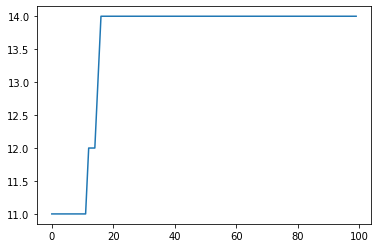

In [20]:
plt.plot(fitness_values)

A random walk usually isn't well suited as an actual search algorithm, it tends to produce even worse solutions than the random search (at least on one max). However, we can now generalize the idea of exploring the neighbourhood to construct some actual local search algoritms.

## Local Search

A local search algorithm consists of (1) a definition of the neighbourhood for a candidate solution, and (2) an exploration operator that picks the next step in the neighbourhood. The neighbourhood is the set of solutions that one can reach from a candidate solution in one step -- in our case, with a single bit flip:

In [21]:
def get_neighbours(candidate):
    neighbours = []
    for pos in range(len(candidate)):
        copy = candidate[:]
        copy[pos] = 1 - copy[pos]
        neighbours.append(copy)
    return neighbours

In [22]:
get_neighbours([0,0,0,0,0,1,0,0,0,0])

[[1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 1]]

### Hillclimbing

The first local search algorithm we consider is very simple: The exploration operator always picks the best neighbour. The result is called _hillclimbing_ because it climbs a hill in the fitness landscape (if we assume a maximisation problem, like in the case of one max). Starting from a random individual, we consider all neighbours, and pick the best one. Then, we repeat this process for this neighbour. The new point in the search space has to be strictly better.

In [23]:
def hillclimbing():

    current = get_random_solution()
    best = current[:]
    best_fitness = get_fitness(current)
    print(f"Starting at fitness {best_fitness}: {current}")

    for step in range(max_steps):

        best_neighbour = None
        neighbour_fitness = -1
        for neighbour in get_neighbours(current):
            fitness = get_fitness(neighbour)

            if fitness > neighbour_fitness:
                best_neighbour = neighbour
                neighbour_fitness = fitness

            
        if neighbour_fitness > best_fitness:
            print(f"Iteration {step}, fitness {best_fitness}: {best}")
            current = best_neighbour
            best = current[:]
            best_fitness = neighbour_fitness

        fitness_values.append(best_fitness)


    print(f"Solution fitness {best_fitness}: {best}")
    return best

When invoking the hillclimber, we need to reset the `fitness_values` list again so we can observe what is happening.

In [24]:
fitness_values = []
hillclimbing()

Starting at fitness 9: [0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
Iteration 0, fitness 9: [0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
Iteration 1, fitness 10: [1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
Iteration 2, fitness 11: [1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
Iteration 3, fitness 12: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
Iteration 4, fitness 13: [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
Iteration 5, fitness 14: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
Iteration 6, fitness 15: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0]
Iteration 7, fitness 16: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0]
Iteration 8, fitness 17: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0]
Iteration 9, fitness 18: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0]
Iteration 10, fitness 19: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

The hillclimber will always find the solution very quickly, no matter how often you repeat the run, within at most `n` steps it will find an optimal solution. Plotting the `fitness_values` shows why the algorithm is called hillclimbing:

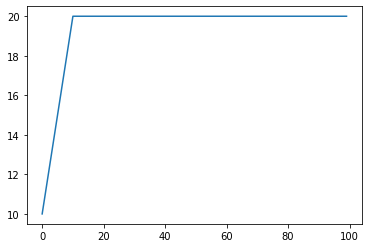

In [25]:
plt.plot(fitness_values)

### The n-queens problem

The hillclimber seems perfect on the one max problem. However, not all problems are this easy. Let's consider an alternative problem: In the _n-queens_ problem the aim is to place _n_ queens on an _n_ x _n_ chessboard in
such a way that they do not check each other.

As first step, we need to find a way to encode this problem such that we can apply the search on this encoding. A simple representation is a list of length _n_, where each element of the list is an integer up to _n_. That is, each element of the list maps to a column of the chess board, and the value of the element denotes the row in which a queen is located in this column.

In [26]:
def get_random_solution():
    return [random.randint(0, n - 1) for _ in range(n)]

In [27]:
get_random_solution()

[13, 3, 7, 18, 5, 14, 15, 16, 18, 8, 8, 1, 2, 11, 10, 4, 15, 13, 15, 2]

In order to help us interpret such a vector, we can use a simple helper function that visualises the list as a matrix.

In [28]:
def print_solution(solution):
    n = len(solution)
    for y in range(n):
        for x in range(n):
            if solution[x] == y:
                print(" Q ", end = '')
            else:
                print(" . ", end = '')
        print()

In [29]:
n = 8
print_solution(get_random_solution())

 Q  .  .  .  Q  .  Q  . 
 .  Q  .  .  .  .  .  . 
 .  .  .  .  .  .  .  . 
 .  .  .  .  .  Q  .  . 
 .  .  Q  .  .  .  .  . 
 .  .  .  Q  .  .  .  . 
 .  .  .  .  .  .  .  Q 
 .  .  .  .  .  .  .  . 


Two queens check each other if they are in the same column, same row, or same diagonal. Since the goal is that no queens check each other, we can formulate an objective function based on how many queens check each other. To be consistent with our previous example, we will make this a _maximisation_ problem, such that the objective function calculates how many queens _don't_ check each other. Using our vector-encoding, there can only be one queen per column by construction. We thus only need to check if queens are in the same row or diagonal. For each pair of queens that does not check each other, we increase our fitness value by 1:

In [30]:
def get_fitness(solution):
    fitness = 0
    for i in range(len(solution) - 1):
        for j in range(i + 1, len(solution)):
            if solution[i] != solution[j] \
                and solution[i] != solution[j] + (j - i) \
                and solution[j] != solution[i] + (j - i):
                fitness += 1

    return fitness

Here's a simple example of all queens in a row, such that they all check each other -- the fitness is thus 0.

In [31]:
x = [0,0,0,0,0,0,0,0]
print_solution(x)
get_fitness(x)

 Q  Q  Q  Q  Q  Q  Q  Q 
 .  .  .  .  .  .  .  . 
 .  .  .  .  .  .  .  . 
 .  .  .  .  .  .  .  . 
 .  .  .  .  .  .  .  . 
 .  .  .  .  .  .  .  . 
 .  .  .  .  .  .  .  . 
 .  .  .  .  .  .  .  . 


0

Here is a solution where no queens check each other:

In [32]:
x = [4, 0, 3, 5, 7, 1, 6, 2]
print_solution(x)
get_fitness(x)

 .  Q  .  .  .  .  .  . 
 .  .  .  .  .  Q  .  . 
 .  .  .  .  .  .  .  Q 
 .  .  Q  .  .  .  .  . 
 Q  .  .  .  .  .  .  . 
 .  .  .  Q  .  .  .  . 
 .  .  .  .  .  .  Q  . 
 .  .  .  .  Q  .  .  . 


28

The optimal fitness value is n*(n-1)/2 = 28 for n = 8.

Before we can apply search on this problem, we need to define the neighbourhood of our problem. In the simplest case, a neighbour moves a queen up or down by one, taking into account the boundaries of the chess board.

In [33]:
def get_neighbours(solution):
    neighbours = []
    for i in range(len(solution)):
        if solution[i] > 0:
            copy = solution[:]
            copy[i] = copy[i] - 1
            neighbours.append(copy)
        if solution[i] < n - 1:
            copy = solution[:]
            copy[i] = copy[i] + 1
            neighbours.append(copy)

    return neighbours

In [34]:
get_neighbours([4,4,4,4,4,4,4,4])

[[3, 4, 4, 4, 4, 4, 4, 4],
 [5, 4, 4, 4, 4, 4, 4, 4],
 [4, 3, 4, 4, 4, 4, 4, 4],
 [4, 5, 4, 4, 4, 4, 4, 4],
 [4, 4, 3, 4, 4, 4, 4, 4],
 [4, 4, 5, 4, 4, 4, 4, 4],
 [4, 4, 4, 3, 4, 4, 4, 4],
 [4, 4, 4, 5, 4, 4, 4, 4],
 [4, 4, 4, 4, 3, 4, 4, 4],
 [4, 4, 4, 4, 5, 4, 4, 4],
 [4, 4, 4, 4, 4, 3, 4, 4],
 [4, 4, 4, 4, 4, 5, 4, 4],
 [4, 4, 4, 4, 4, 4, 3, 4],
 [4, 4, 4, 4, 4, 4, 5, 4],
 [4, 4, 4, 4, 4, 4, 4, 3],
 [4, 4, 4, 4, 4, 4, 4, 5]]

Let's first try how well random search copes with this problem. Since the problem is quite a bit more difficult than one max, let's also increase the maximum number of steps.

Iteration 0, fitness 18: [4, 5, 3, 7, 4, 3, 0, 3]
Iteration 2, fitness 19: [5, 1, 3, 6, 5, 1, 7, 1]
Iteration 5, fitness 21: [4, 0, 2, 5, 1, 1, 2, 4]
Iteration 14, fitness 22: [0, 7, 3, 6, 4, 2, 7, 1]
Iteration 18, fitness 24: [4, 5, 0, 5, 3, 2, 6, 3]
Iteration 37, fitness 25: [1, 7, 5, 3, 0, 4, 6, 3]
Iteration 753, fitness 26: [4, 0, 3, 5, 7, 2, 0, 7]
Solution fitness 26: [4, 0, 3, 5, 7, 2, 0, 7]


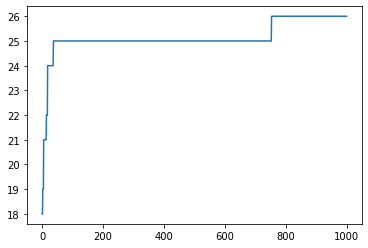

In [35]:
max_steps = 1000
fitness_values = []
randomsearch()
plt.plot(fitness_values)

Now let's compare this to our local search algorithm, hillclimbing:

Starting at fitness 22: [0, 7, 1, 1, 3, 2, 6, 5]
Iteration 0, fitness 22: [0, 7, 1, 1, 3, 2, 6, 5]
Solution fitness 23: [0, 7, 1, 1, 3, 2, 7, 5]


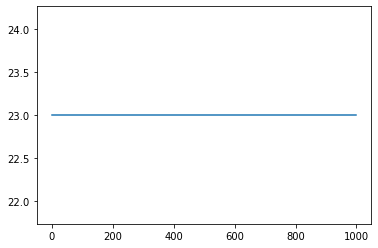

In [36]:
fitness_values = []
hillclimbing()
plt.plot(fitness_values)

Is hillclimbing still better than the random search? In many cases, it isn't. The reason is that, unlike for one max, there are _local optima_ in the search space. Our hillclimber is forced to consider only strictly better neighbours, hence it is stuck once it reaches a local optimum. (If we would allow it to move across fitness-plateaux, i.e., neighbours of equal fitness, it might get stuck in an infinite loop.)

As an example, consider the following solution:

In [37]:
x = [7, 1, 2, 0, 5, 3, 0, 4]
print_solution(x)
get_fitness(x)

 .  .  .  Q  .  .  Q  . 
 .  Q  .  .  .  .  .  . 
 .  .  Q  .  .  .  .  . 
 .  .  .  .  .  Q  .  . 
 .  .  .  .  .  .  .  Q 
 .  .  .  .  Q  .  .  . 
 .  .  .  .  .  .  .  . 
 Q  .  .  .  .  .  .  . 


25

Let's consider the fitness values of all the neighbours of this solution:

In [38]:
for neighbour in get_neighbours([7, 1, 2, 0, 5, 3, 0, 4]):
    print(f"{neighbour} -> {get_fitness(neighbour)}")

[6, 1, 2, 0, 5, 3, 0, 4] -> 24
[7, 0, 2, 0, 5, 3, 0, 4] -> 24
[7, 2, 2, 0, 5, 3, 0, 4] -> 23
[7, 1, 1, 0, 5, 3, 0, 4] -> 24
[7, 1, 3, 0, 5, 3, 0, 4] -> 24
[7, 1, 2, 1, 5, 3, 0, 4] -> 24
[7, 1, 2, 0, 4, 3, 0, 4] -> 21
[7, 1, 2, 0, 6, 3, 0, 4] -> 25
[7, 1, 2, 0, 5, 2, 0, 4] -> 21
[7, 1, 2, 0, 5, 4, 0, 4] -> 23
[7, 1, 2, 0, 5, 3, 1, 4] -> 24
[7, 1, 2, 0, 5, 3, 0, 3] -> 25
[7, 1, 2, 0, 5, 3, 0, 5] -> 24


As you can see, none of the neighbours of `x` has a better fitness value than `x` itself. The hillclimber has nowhere to go, and is stuck.

A simple solution to this problem is to use _random restarts_: If the hillclimber is stuck in an optimum, we restart the search from a new random point. With some luck, the next attempt will climb a different optimum.

In [39]:
def hillclimbing_restart():

    current = get_random_solution()
    best = current[:]
    best_fitness = get_fitness(current)
    print(f"Starting at fitness {best_fitness}: {current}")

    for step in range(max_steps):

        best_neighbour = None
        neighbour_fitness = -1
        for neighbour in get_neighbours(current):
            fitness = get_fitness(neighbour)

            if fitness > neighbour_fitness:
                best_neighbour = neighbour
                neighbour_fitness = fitness
        
        # Random restart if no neighbour is better
        if neighbour_fitness <= get_fitness(current):
            current = get_random_solution()
            neighbour_fitness = get_fitness(current)
        else:
            current = best_neighbour
            
        if neighbour_fitness > best_fitness:
            print(f"Iteration {step}, fitness {best_fitness}: {best}")
            best = current[:]
            best_fitness = neighbour_fitness
            
        fitness_values.append(best_fitness)


    print(f"Solution fitness {best_fitness}: {best}")
    return best

Starting at fitness 21: [3, 0, 1, 3, 7, 5, 4, 0]
Iteration 0, fitness 21: [3, 0, 1, 3, 7, 5, 4, 0]
Iteration 1, fitness 24: [2, 0, 1, 3, 7, 5, 4, 0]
Iteration 8, fitness 25: [2, 0, 1, 3, 7, 6, 4, 0]
Iteration 55, fitness 26: [6, 4, 0, 3, 5, 7, 1, 6]
Solution fitness 28: [3, 1, 7, 5, 0, 2, 4, 6]


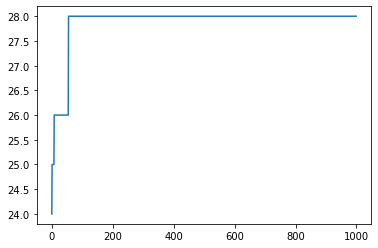

In [40]:
fitness_values = []
hillclimbing_restart()
plt.plot(fitness_values)

Using the random restarts, the hillclimber tends to be better than before, and better than random search -- even if it still doesn't always find the best solution, depending on what value you choose for `max_steps`.

The version we considered is called _steepest ascent_ hillclimbing, because it will always explore all neighbours, and then pick the best one. An alternative approach is _first ascent_, which will pick the first neighbour that has a better fitness value.

In [41]:
def hillclimbing_first_ascent():

    current = get_random_solution()
    fitness = get_fitness(current)
    best = current[:]
    best_fitness = fitness
    print(f"Starting at fitness {best_fitness}: {current}")

    for step in range(max_steps):

        replaced = False
        for neighbour in get_neighbours(current):
            neighbour_fitness = get_fitness(neighbour)

            if neighbour_fitness > fitness:
                current = neighbour
                fitness = neighbour_fitness
                replaced = True
                break

        # Random restart if no neighbour is better
        if not replaced:
            current = get_random_solution()
            fitness = get_fitness(current)
            
        if fitness > best_fitness:
            print(f"Iteration {step}, fitness {best_fitness}: {best}")
            best = current[:]
            best_fitness = fitness

        fitness_values.append(best_fitness)


    print(f"Solution fitness {best_fitness}: {best}")
    return best

For some problems, a first-ascent strategy may be less likely to run into local optima, because it is not so "eager" to climb the hill. However, this depends on the problem at hand, and luck. 

Starting at fitness 21: [6, 5, 3, 7, 6, 3, 6, 2]
Iteration 0, fitness 21: [6, 5, 3, 7, 6, 3, 6, 2]
Iteration 1, fitness 22: [5, 5, 3, 7, 6, 3, 6, 2]
Iteration 2, fitness 23: [5, 5, 3, 7, 7, 3, 6, 2]
Iteration 3, fitness 24: [5, 5, 4, 7, 7, 3, 6, 2]
Iteration 25, fitness 25: [5, 6, 4, 7, 7, 3, 6, 2]
Iteration 39, fitness 26: [6, 3, 1, 7, 5, 2, 4, 0]
Solution fitness 27: [1, 2, 7, 5, 3, 0, 6, 4]


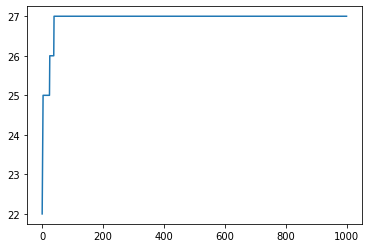

In [42]:
fitness_values = []
hillclimbing_first_ascent()
plt.plot(fitness_values)

For our n-queens problem, is steepest ascent or first ascent better? And is either of them better than random search? To find out, we can run all three algorithms and compare the results.

Iteration 0, fitness 17: [5, 2, 3, 2, 0, 0, 3, 6]
Iteration 1, fitness 20: [6, 7, 7, 7, 1, 0, 3, 0]
Iteration 5, fitness 25: [3, 7, 0, 2, 1, 5, 6, 4]
Iteration 251, fitness 26: [5, 1, 4, 6, 3, 0, 2, 7]
Solution fitness 26: [5, 1, 4, 6, 3, 0, 2, 7]
Starting at fitness 17: [4, 5, 3, 7, 2, 5, 5, 3]
Iteration 0, fitness 17: [4, 5, 3, 7, 2, 5, 5, 3]
Iteration 1, fitness 22: [4, 6, 3, 7, 2, 5, 5, 3]
Iteration 2, fitness 24: [4, 6, 3, 6, 2, 5, 5, 3]
Iteration 28, fitness 25: [4, 7, 3, 6, 2, 5, 5, 3]
Iteration 70, fitness 26: [5, 3, 0, 7, 4, 1, 1, 2]
Iteration 209, fitness 27: [5, 1, 6, 4, 7, 7, 0, 2]
Solution fitness 28: [3, 6, 4, 2, 0, 5, 7, 1]
Starting at fitness 21: [1, 5, 1, 3, 7, 0, 1, 7]
Iteration 0, fitness 21: [1, 5, 1, 3, 7, 0, 1, 7]
Iteration 1, fitness 23: [2, 5, 1, 3, 7, 0, 1, 7]
Iteration 2, fitness 24: [2, 5, 1, 4, 7, 0, 1, 7]
Iteration 8, fitness 25: [2, 5, 1, 4, 7, 0, 0, 7]
Iteration 115, fitness 26: [1, 1, 4, 2, 7, 3, 3, 0]
Iteration 236, fitness 27: [7, 4, 2, 0, 6, 3, 5, 1]


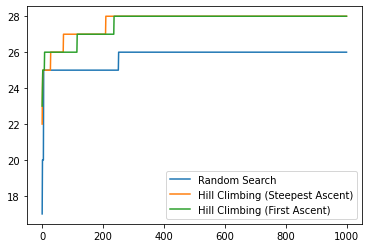

In [43]:
fitness_values = []
randomsearch()
f_random = fitness_values[:]

fitness_values = []
hillclimbing_restart()
f_hill = fitness_values[:]

fitness_values = []
hillclimbing_first_ascent()
f_first = fitness_values[:]

plt.plot(f_random, label="Random Search")
plt.plot(f_hill, label="Hill Climbing (Steepest Ascent)")
plt.plot(f_first, label="Hill Climbing (First Ascent)")
plt.legend()

There are two problems with this comparison:

1. Every time you run the algorithm, you will get a different result. Sometimes one algorithm performs better than another, sometimes it doesn't. There may be trends, though.
2. The comparison actually isn't fair. In each iteration, random search considers exactly one candidate solution, steepest ascent considers up to _2*n_ solutions, and first ascent is somewhere in between. 

To address the first problem, we need to compare multiple runs, not just individual runs. We will get back to this problem in a bit.

To make the comparison fair, we need to use a stopping condition that amounts to the same computation time for each algorithm. In practice, one often uses _time_ (because users may not understand the algorithms applied but do have an opinion on how long they are prepared to wait). Another metric for fair comparisons, which we will use, is the number of _fitness evaluations_. This is already what our random search does, but we have to adapt our hillclimbers slightly.

In [44]:
def hillclimbing_restart():

    current = get_random_solution()
    best = current[:]
    best_fitness = get_fitness(current)
    print(f"Starting at fitness {best_fitness}: {current}")

    step = 0
    while step < max_steps:

        best_neighbour = None
        neighbour_fitness = -1
        for neighbour in get_neighbours(current):
            fitness = get_fitness(neighbour)
            step += 1

            if fitness > neighbour_fitness:
                best_neighbour = neighbour
                neighbour_fitness = fitness
                if fitness > best_fitness:
                    print(f"Iteration {step}, fitness {best_fitness}: {best}")
                    best = current[:]
                    best_fitness = fitness

            fitness_values.append(best_fitness)
        
        # Random restart if no neighbour is better
        if neighbour_fitness <= get_fitness(current):
            current = get_random_solution()
            neighbour_fitness = get_fitness(current)
            step += 1
            if fitness > best_fitness:
                print(f"Iteration {step}, fitness {best_fitness}: {best}")
                best = current[:]
                best_fitness = fitness
                fitness_values.append(best_fitness)
        else:
            current = best_neighbour

    print(f"Solution fitness {best_fitness}: {best}")
    return best

In [45]:
def hillclimbing_first_ascent():

    current = get_random_solution()
    fitness = get_fitness(current)
    best = current[:]
    best_fitness = fitness
    print(f"Starting at fitness {best_fitness}: {current}")

    step = 0
    while step < max_steps:

        replaced = False
        for neighbour in get_neighbours(current):
            neighbour_fitness = get_fitness(neighbour)
            step += 1
            if neighbour_fitness > fitness:
                current = neighbour
                fitness = neighbour_fitness
                replaced = True
                if fitness > best_fitness:
                    print(f"Iteration {step}, fitness {best_fitness}: {best}")
                    best = current[:]
                    best_fitness = fitness

                fitness_values.append(best_fitness)
                break
            else:
                fitness_values.append(best_fitness)

        # Random restart if no neighbour is better
        if not replaced:
            current = get_random_solution()
            fitness = get_fitness(current)
            step += 1
            if fitness > best_fitness:
                print(f"Iteration {step}, fitness {best_fitness}: {best}")
                best = current[:]
                best_fitness = fitness
                fitness_values.append(best_fitness)


    print(f"Solution fitness {best_fitness}: {best}")
    return best

Iteration 0, fitness 20: [7, 5, 5, 3, 6, 1, 5, 4]
Iteration 2, fitness 22: [5, 6, 0, 6, 5, 7, 4, 3]
Iteration 5, fitness 23: [7, 0, 6, 6, 1, 5, 3, 2]
Iteration 8, fitness 24: [3, 1, 6, 2, 1, 7, 4, 4]
Iteration 206, fitness 25: [0, 6, 4, 7, 1, 4, 3, 5]
Solution fitness 25: [0, 6, 4, 7, 1, 4, 3, 5]
Starting at fitness 22: [4, 1, 4, 5, 3, 1, 3, 7]
Iteration 3, fitness 22: [4, 1, 4, 5, 3, 1, 3, 7]
Iteration 4, fitness 23: [4, 1, 4, 5, 3, 1, 3, 7]
Iteration 21, fitness 24: [4, 1, 4, 5, 3, 1, 3, 7]
Iteration 367, fitness 25: [4, 2, 4, 5, 3, 1, 3, 7]
Solution fitness 26: [7, 2, 3, 1, 6, 4, 2, 4]
Starting at fitness 16: [4, 0, 2, 3, 0, 4, 0, 2]
Iteration 1, fitness 16: [4, 0, 2, 3, 0, 4, 0, 2]
Iteration 4, fitness 18: [3, 0, 2, 3, 0, 4, 0, 2]
Iteration 9, fitness 19: [3, 1, 2, 3, 0, 4, 0, 2]
Iteration 17, fitness 20: [3, 1, 1, 3, 0, 4, 0, 2]
Iteration 25, fitness 22: [3, 1, 1, 4, 0, 4, 0, 2]
Iteration 54, fitness 23: [3, 1, 1, 5, 0, 4, 0, 2]
Iteration 69, fitness 24: [0, 2, 3, 6, 4, 1, 1, 4]
I

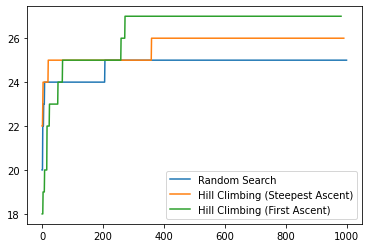

In [46]:
fitness_values = []
randomsearch()
f_random = fitness_values[:]

fitness_values = []
hillclimbing_restart()
f_hill = fitness_values[:]

fitness_values = []
hillclimbing_first_ascent()
f_first = fitness_values[:]

plt.plot(f_random, label="Random Search")
plt.plot(f_hill, label="Hill Climbing (Steepest Ascent)")
plt.plot(f_first, label="Hill Climbing (First Ascent)")
plt.legend()

There probably isn't a clear winner yet. We will first introduce an algorithm that can cope better with local optima before turning to the question how to compare algorithms.

## Tabu Search

In tabu search, a tabu list prevents re-exploration of already visited parts of search space, but therefore the search is allowed to make moves in the search space that lead to worse fitness (whereas hillclimbing only allows moves that improve fitness).

The tabu list is often implemented as a circular buffer, where solutions are added as their fitness is evaluated, and they are removed once they have been in the buffer for a certain number of steps. Let's introduce a parameter to denote the size of our buffer.

In [47]:
tabu_size = 500

The algorithm itself is very similar to hillclimbing, except for the following changes:
- Only neighbours that are not in the tabu list are considered
- The search moves to the best neighbour, even if that neighbour has worse fitness
- The tabu list is updated at each step

In [48]:
def tabusearch():
    current = get_random_solution()
    fitness = get_fitness(current)

    tabu = [current]

    best_solution = current
    best_fitness = fitness

    print(f"Initial solution: {current} fitness {fitness}")

    iteration = 0
    step = 0
    while step < max_steps:
        best_neighbour = None

        neighbour_fitness = 0
        for neighbour in get_neighbours(current):
            if neighbour not in tabu:
                new_fitness = get_fitness(neighbour)
                step += 1
                if new_fitness > neighbour_fitness:
                    best_neighbour = neighbour
                    neighbour_fitness = new_fitness
                    if neighbour_fitness > best_fitness:
                        best_fitness = neighbour_fitness
                        best_solution = best_neighbour
                        print(f"Iteration: {iteration}, fitness {best_fitness}, steps {step}")
                fitness_values.append(best_fitness)
                

        # Append at the end of the tabu list
        tabu.append(best_neighbour)
        current = best_neighbour
        
        # Remove elements from the front of the tabu list
        if len(tabu) > tabu_size:
            tabu.pop(0)
        
        iteration += 1


    print(f"Final solution: {best_solution} fitness {best_fitness} in {step} steps")

    return best_solution

Iteration 0, fitness 21: [0, 2, 4, 2, 1, 5, 6, 6]
Iteration 6, fitness 22: [4, 6, 4, 7, 2, 1, 5, 7]
Iteration 17, fitness 23: [6, 1, 5, 7, 4, 3, 2, 4]
Iteration 24, fitness 24: [5, 7, 4, 1, 7, 6, 1, 0]
Iteration 61, fitness 25: [5, 5, 1, 6, 0, 3, 0, 7]
Iteration 287, fitness 26: [7, 1, 3, 1, 6, 4, 0, 4]
Iteration 1521, fitness 27: [4, 7, 3, 0, 7, 5, 1, 6]
Solution fitness 27: [4, 7, 3, 0, 7, 5, 1, 6]
Initial solution: [2, 6, 2, 0, 0, 4, 0, 7] fitness 22
Iteration: 0, fitness 23, steps 1
Iteration: 0, fitness 25, steps 6
Iteration: 1, fitness 26, steps 18
Iteration: 16, fitness 27, steps 202
Iteration: 22, fitness 28, steps 277
Final solution: [3, 5, 0, 4, 1, 7, 2, 6] fitness 28 in 5000 steps
Starting at fitness 22: [2, 7, 1, 1, 4, 5, 5, 3]
Iteration 3, fitness 22: [2, 7, 1, 1, 4, 5, 5, 3]
Iteration 15, fitness 23: [2, 6, 1, 1, 4, 5, 5, 3]
Iteration 27, fitness 24: [2, 6, 1, 1, 4, 6, 5, 3]
Iteration 111, fitness 25: [2, 6, 1, 1, 4, 7, 5, 3]
Iteration 497, fitness 26: [3, 6, 0, 2, 5, 1, 

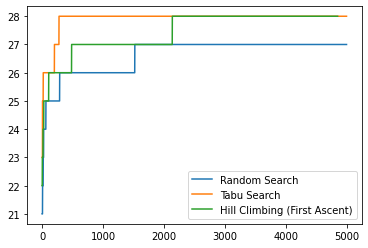

In [49]:
max_steps = 5000

fitness_values = []
randomsearch()
f_random = fitness_values[:]

fitness_values = []
tabusearch()
f_tabu = fitness_values[:]

fitness_values = []
hillclimbing_first_ascent()
f_first = fitness_values[:]

plt.plot(f_random, label="Random Search")
plt.plot(f_tabu, label="Tabu Search")
plt.plot(f_first, label="Hill Climbing (First Ascent)")
plt.legend()

(to be continued November 3)